In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [9]:
DATA_PATH = 'https://raw.githubusercontent.com/roysohan/MLCourse/main/session2/'

In [10]:
sensex_df = pd.read_csv(DATA_PATH+"Sensex.csv",
                        index_col=False, 
                        parse_dates=['Date'])

In [11]:
sensex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    125 non-null    datetime64[ns]
 1   Open    125 non-null    float64       
 2   High    125 non-null    float64       
 3   Low     125 non-null    float64       
 4   Close   125 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 5.0 KB


In [12]:
sensex_df.head()

,Date,Open,High,Low,Close
0,2022-09-26,57525.03,57708.38,57038.24,57145.22
1,2022-09-27,57376.52,57704.57,56950.52,57107.52
2,2022-09-28,56710.13,57213.33,56485.67,56598.28
3,2022-09-29,56997.90,57166.14,56314.05,56409.96
4,2022-09-30,56240.15,57722.63,56147.23,57426.92


In [13]:
sensex_df = sensex_df.set_index('Date', drop=True)

In [15]:
sensex_df['sensex_gain'] = (sensex_df.Close - sensex_df.Open)*100/sensex_df.Open


In [17]:
sensex_df[0:5]

,Open,High,Low,Close,sensex_gain
Date,,,,,
2022-09-26,57525.03,57708.38,57038.24,57145.22,-0.660252
2022-09-27,57376.52,57704.57,56950.52,57107.52,-0.468833
2022-09-28,56710.13,57213.33,56485.67,56598.28,-0.197231
2022-09-29,56997.90,57166.14,56314.05,56409.96,-1.031512
2022-09-30,56240.15,57722.63,56147.23,57426.92,2.110183


In [18]:
def get_stock_gain( filename ):
    # Read the csv file
    df = pd.read_csv(filename, index_col = False, parse_dates=['Date'])
    # Set the time index 
    df = df.set_index(['Date'], drop=True)

    # Sort the records based on time
    df.sort_index(ascending = True, inplace=True)

    # Select only Close and Open Price columns for further analysis
    df['gain'] = ((df['Close Price'] - df['Open Price']) * 100 /
                    df['Open Price'])

    return df[['Close Price', 'Open Price', 'gain']]

In [19]:
icici_df = get_stock_gain (DATA_PATH+"icici.csv")
maruti_df = get_stock_gain (DATA_PATH+"maruti.csv")
ongc_df = get_stock_gain (DATA_PATH+"ongc.csv")
spicejet_df = get_stock_gain (DATA_PATH+"spicejet.csv")
zomato_df = get_stock_gain (DATA_PATH+"zomato.csv")

In [51]:
sensex_df['icici_gain'] = icici_df['gain']
sensex_df['maruti_gain'] = maruti_df['gain']
sensex_df['ongc_gain'] = ongc_df['gain']
sensex_df['spicejet_gain'] = spicejet_df['gain']
sensex_df['zomato_gain'] = zomato_df['gain']

In [21]:
from scipy import stats

In [52]:
icici_stats = icici_df.gain.describe()
maruti_stats = maruti_df.gain.describe()
ongc_stats = ongc_df.gain.describe()
spicejet_stats = spicejet_df.gain.describe()
zomato_stats = zomato_df.gain.describe()

In [53]:
icici_iqr = stats.iqr(icici_df.gain)
icici_min = icici_stats['25%'] - 1.5 * icici_iqr
icici_max = icici_stats['75%'] + 1.5 * icici_iqr
ongc_iqr = stats.iqr(ongc_df.gain)
ongc_min = ongc_stats['25%'] - 1.5 * ongc_iqr
ongc_max = ongc_stats['75%'] + 1.5 * ongc_iqr
maruti_iqr = stats.iqr(maruti_df.gain)
maruti_min = maruti_stats['25%'] - 1.5 * maruti_iqr
maruti_max = maruti_stats['75%'] + 1.5 * maruti_iqr
spicejet_iqr = stats.iqr(spicejet_df.gain)
spicejet_min = spicejet_stats['25%'] - 1.5 * spicejet_iqr
spicejet_max = spicejet_stats['75%'] + 1.5 * spicejet_iqr
zomato_iqr = stats.iqr(zomato_df.gain)
zomato_min = zomato_stats['25%'] - 1.5 * zomato_iqr
zomato_max = zomato_stats['75%'] + 1.5 * zomato_iqr

In [43]:
icici_df[icici_df.gain>icici_max]

,Close Price,Open Price,gain
Date,,,


In [44]:
ongc_df[ongc_df.gain>ongc_max]

,Close Price,Open Price,gain
Date,,,
2023-02-16,155.85,149.6,4.177807


In [45]:
maruti_df[maruti_df.gain>maruti_max]

,Close Price,Open Price,gain
Date,,,
2022-10-28,9494.1,9054.4,4.856203
2023-01-24,8698.6,8435.0,3.125074


In [46]:
spicejet_df[spicejet_df.gain>spicejet_max]

,Close Price,Open Price,gain
Date,,,
2022-09-30,39.00,36.80,5.978261
2022-10-21,40.70,38.85,4.761905
2022-12-06,42.15,39.30,7.251908
2022-12-26,37.85,35.05,7.988588
2023-02-16,35.95,32.90,9.270517
2023-02-17,37.55,35.50,5.774648
2023-02-24,39.70,35.70,11.204482
2023-03-16,33.95,32.80,3.506098
2023-03-20,34.32,33.10,3.685801


In [47]:
zomato_df[zomato_df.gain>zomato_max]

,Close Price,Open Price,gain
Date,,,
2022-10-07,69.60,65.05,6.994620
2022-11-11,72.80,65.60,10.975610
2022-12-26,58.20,53.80,8.178439
2023-02-08,54.25,51.00,6.372549


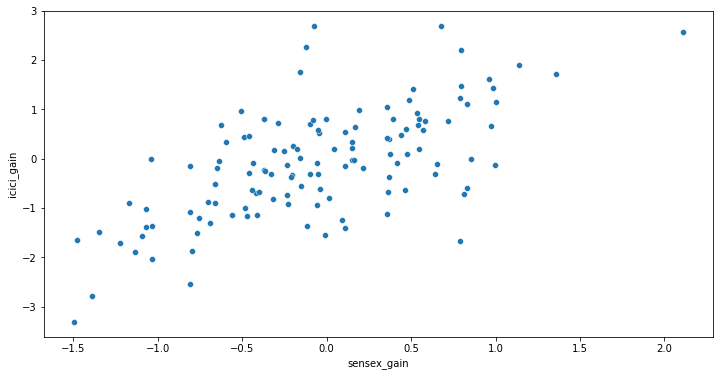

In [48]:
plt.figure(figsize=(12, 6))
sn.scatterplot(data = sensex_df, x = 'sensex_gain', y = 'icici_gain');

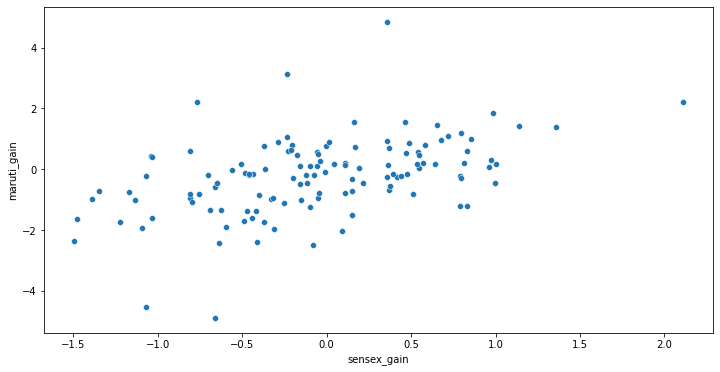

In [49]:
plt.figure(figsize=(12, 6))
sn.scatterplot(data = sensex_df, x = 'sensex_gain', y = 'maruti_gain');
     

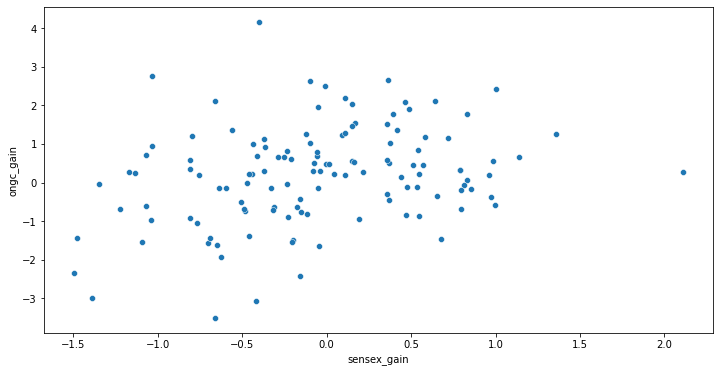

In [54]:
plt.figure(figsize=(12, 6))
sn.scatterplot(data = sensex_df, x = 'sensex_gain', y = 'ongc_gain');
     

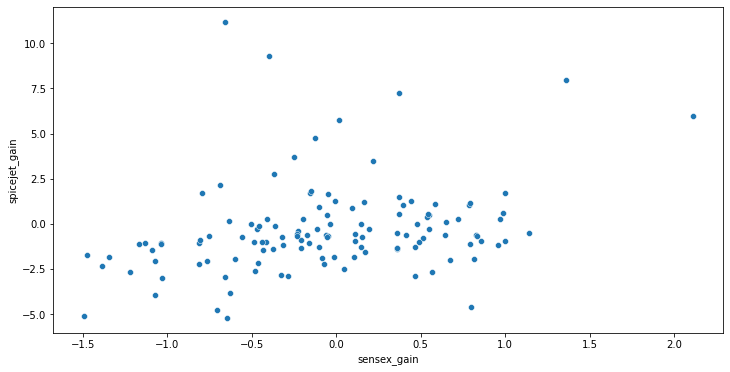

In [55]:
plt.figure(figsize=(12, 6))
sn.scatterplot(data = sensex_df, x = 'sensex_gain', y = 'spicejet_gain');
     

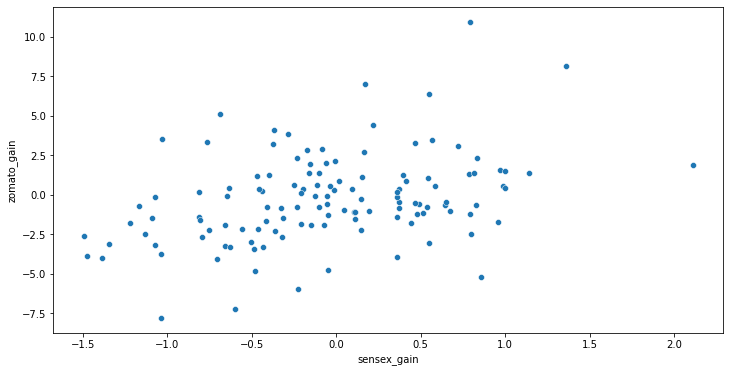

In [56]:
plt.figure(figsize=(12, 6))
sn.scatterplot(data = sensex_df, x = 'sensex_gain', y = 'zomato_gain');
     

In [57]:
sensex_df[['sensex_gain', 'icici_gain']].corr()

,sensex_gain,icici_gain
sensex_gain,1.000000,0.652926
icici_gain,0.652926,1.000000


In [58]:
sensex_df[['sensex_gain', 'maruti_gain']].corr()

,sensex_gain,maruti_gain
sensex_gain,1.000000,0.475453
maruti_gain,0.475453,1.000000


In [59]:
sensex_df[['sensex_gain', 'ongc_gain']].corr()

,sensex_gain,ongc_gain
sensex_gain,1.000000,0.283118
ongc_gain,0.283118,1.000000


In [60]:
sensex_df[['sensex_gain', 'spicejet_gain']].corr()

,sensex_gain,spicejet_gain
sensex_gain,1.000000,0.282073
spicejet_gain,0.282073,1.000000


In [61]:
sensex_df[['sensex_gain', 'zomato_gain']].corr()

,sensex_gain,zomato_gain
sensex_gain,1.000000,0.371301
zomato_gain,0.371301,1.000000


In [62]:
sector_corr = sensex_df[['sensex_gain', 
                         'icici_gain', 
                         'maruti_gain',
                         'ongc_gain',
                         'spicejet_gain',
                         'zomato_gain']].corr()
sector_corr

,sensex_gain,icici_gain,maruti_gain,ongc_gain,spicejet_gain,zomato_gain
sensex_gain,1.000000,0.652926,0.475453,0.283118,0.282073,0.371301
icici_gain,0.652926,1.000000,0.324002,0.095821,0.197633,0.207068
maruti_gain,0.475453,0.324002,1.000000,0.223336,0.166088,0.168163
ongc_gain,0.283118,0.095821,0.223336,1.000000,0.354521,0.231791
spicejet_gain,0.282073,0.197633,0.166088,0.354521,1.000000,0.256418
zomato_gain,0.371301,0.207068,0.168163,0.231791,0.256418,1.000000


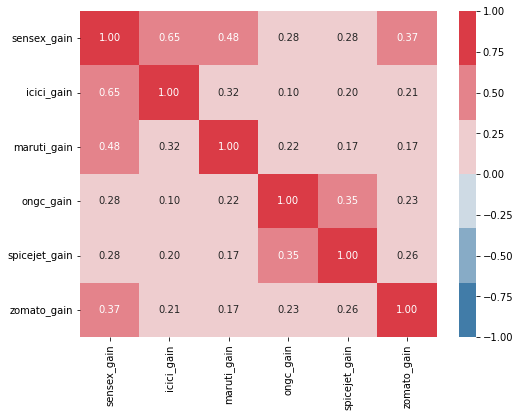

In [63]:
plt.figure(figsize=(8, 6))
sn.heatmap(sector_corr,
           annot = True,
           fmt = "0.2f",
           cmap = sn.diverging_palette(240, 10),
           vmin = -1.0, 
           vmax = 1.0);